In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import os
import mplcyberpunk

plt.style.use("cyberpunk")

import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir('C:/Users/jean_/dev/github/EDA/Documents/database/')
diretorio_atual = os.getcwd()

df_udemy = pd.DataFrame(pd.read_csv("udemy_courses.csv", sep = ",", decimal = ".", parse_dates = ['published_timestamp']))

In [3]:
df_udemy

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14 17:36:46+00:00,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10 22:24:30+00:00,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30 16:41:42+00:00,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11 19:06:15+00:00,Web Development


In [4]:
df_udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
dtypes: bool(1), datetime

In [5]:
df_udemy.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [6]:
df_udemy['course_id'].duplicated().any()
df_udemy[df_udemy.duplicated(keep = False)]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
453,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16 18:28:30+00:00,Business Finance
454,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23 16:19:01+00:00,Business Finance
463,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02 14:29:35+00:00,Business Finance
778,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15 14:56:17+00:00,Business Finance
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16 18:28:30+00:00,Business Finance
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23 16:19:01+00:00,Business Finance
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15 14:56:17+00:00,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02 14:29:35+00:00,Business Finance
1234,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15 21:48:55+00:00,Graphic Design
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15 21:48:55+00:00,Graphic Design


In [7]:
df_udemy = df_udemy.drop_duplicates(subset = 'course_id')

In [8]:
df_udemy['Year'] = df_udemy['published_timestamp'].dt.year
df_udemy['Month'] = df_udemy['published_timestamp'].dt.month

In [9]:
df_udemy = df_udemy.drop(columns = ['url', 'published_timestamp'], axis = 1)

In [10]:
df_udemy

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,Year,Month
0,1070968,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,Business Finance,2017,1
1,1113822,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,Business Finance,2017,3
2,1006314,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,Business Finance,2016,12
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,Business Finance,2017,5
4,1011058,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,Business Finance,2016,12
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,True,100,1040,14,21,All Levels,2.0,Web Development,2016,6
3674,1088178,How To Design A WordPress Website With No Codi...,True,25,306,3,42,Beginner Level,3.5,Web Development,2017,3
3675,635248,Learn and Build using Polymer,True,40,513,169,48,All Levels,3.5,Web Development,2015,12
3676,905096,CSS Animations: Create Amazing Effects on Your...,True,50,300,31,38,All Levels,3.0,Web Development,2016,8


In [11]:
df_udemy['Year'].value_counts()

Year
2016    1204
2015    1014
2017     713
2014     490
2013     201
2012      45
2011       5
Name: count, dtype: int64

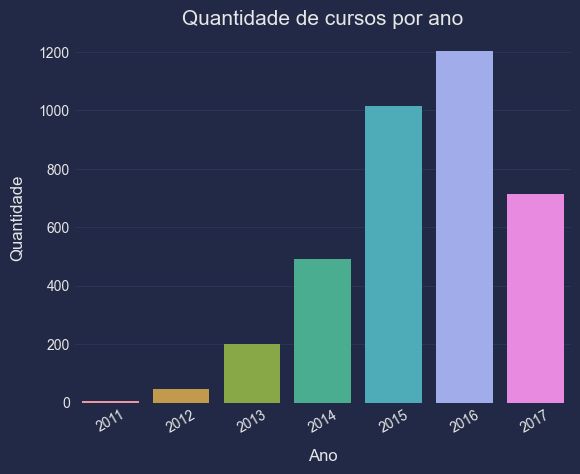

In [12]:
fig, ax = plt.subplots()

ax = sns.countplot( data = df_udemy, x = 'Year')
plt.title('Quantidade de cursos por ano', fontsize = 15)
ax.set_ylabel('Quantidade', labelpad = 10, fontsize = 12)
ax.set_xlabel('Ano', labelpad = 10, fontsize = 12)
plt.xticks(rotation = 30)

plt.show()

In [13]:
df_udemy['subject'].value_counts()

subject
Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64

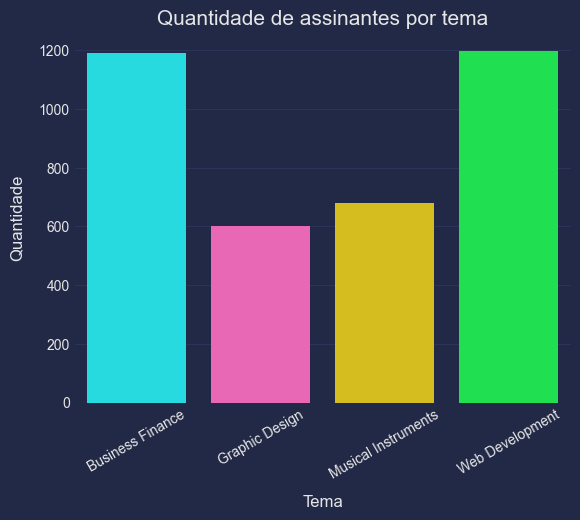

In [14]:
fig, ax = plt.subplots()

ax = sns.countplot( data = df_udemy, x = 'subject')
plt.title('Quantidade de assinantes por tema', fontsize = 15)
ax.set_ylabel('Quantidade', labelpad = 10, fontsize = 12)
ax.set_xlabel('Tema', labelpad = 10, fontsize = 12)
plt.xticks(rotation = 30)

plt.show()

In [15]:
df_udemy['level'].value_counts()

level
All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

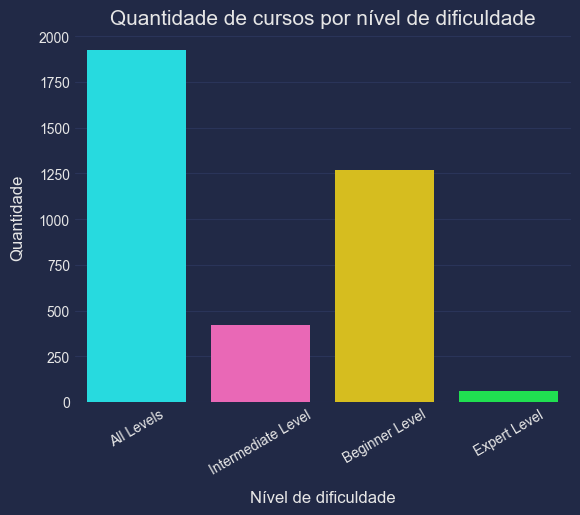

In [16]:
fig, ax = plt.subplots()

ax = sns.countplot( data = df_udemy, x = 'level')
plt.title('Quantidade de cursos por nível de dificuldade', fontsize = 15)
ax.set_ylabel('Quantidade', labelpad = 10, fontsize = 12)
ax.set_xlabel('Nível de dificuldade', labelpad = 10, fontsize = 12)
plt.xticks(rotation = 30)

plt.show()

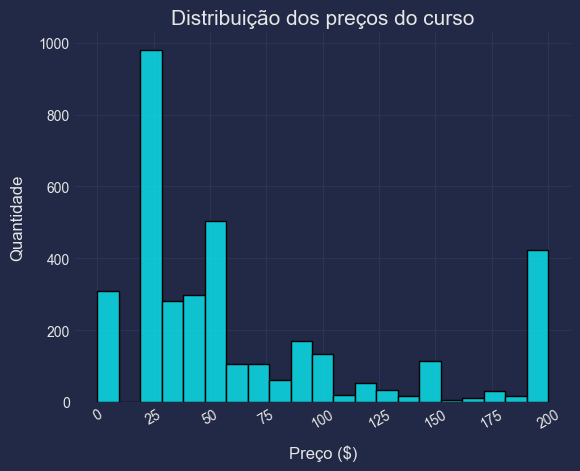

In [17]:
fig, ax = plt.subplots()

ax = sns.histplot( data = df_udemy, x = 'price')
plt.title('Distribuição dos preços do curso', fontsize = 15)
ax.set_ylabel('Quantidade', labelpad = 10, fontsize = 12)
ax.set_xlabel('Preço ($)', labelpad = 10, fontsize = 12)
plt.xticks(rotation = 30)

plt.show()

In [18]:
df_udemy['is_paid'].value_counts()

is_paid
True     3362
False     310
Name: count, dtype: int64

In [19]:
df_udemy_col_numericas = df_udemy
df_udemy_col_numericas = df_udemy_col_numericas.drop(['course_id', 'course_title', 'level', 'subject'], axis = 1)

In [20]:
df_udemy_col_numericas.groupby('is_paid').mean()

,price,num_subscribers,num_reviews,num_lectures,content_duration,Year,Month
is_paid,,,,,,,
False,0.000000,11533.951613,425.929032,21.416129,2.210753,2015.500000,5.777419
True,72.198096,2421.270077,131.516359,41.866746,4.271584,2015.424747,6.201071


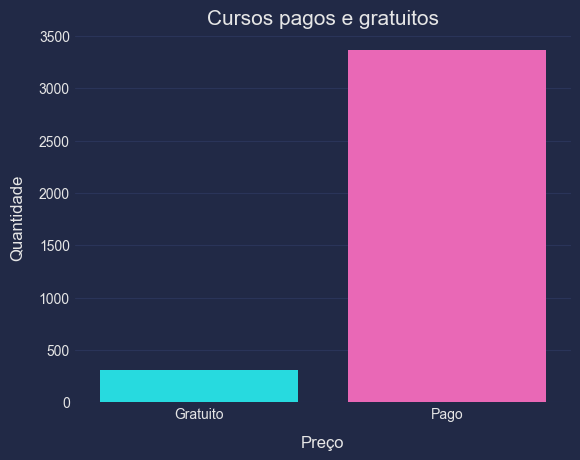

In [21]:
fig, ax = plt.subplots()

ax = sns.countplot( data = df_udemy, x = 'is_paid')
plt.title('Cursos pagos e gratuitos', fontsize = 15)
ax.set_ylabel('Quantidade', labelpad = 10, fontsize = 12)
ax.set_xlabel('Preço', labelpad = 10, fontsize = 12)

plt.xticks([0, 1], ['Gratuito', 'Pago'])

plt.show()

In [22]:
df_udemy_top_10_cursos = df_udemy.sort_values(by = 'num_subscribers', ascending = False).head(10)
df_udemy_top_10_cursos

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,Year,Month
2827,41295,Learn HTML5 Programming From Scratch,False,0,268923,8629,45,All Levels,10.5,Web Development,2013,2
3032,59014,Coding for Entrepreneurs Basic,False,0,161029,279,27,Beginner Level,3.5,Web Development,2013,6
3230,625204,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43.0,Web Development,2015,11
2783,173548,Build Your First Website in 1 Week with HTML5 ...,False,0,120291,5924,30,Beginner Level,3.0,Web Development,2014,4
3232,764164,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5,Web Development,2016,3
1896,19421,Free Beginner Electric Guitar Lessons,False,0,101154,1042,95,Beginner Level,4.5,Musical Instruments,2012,6
2589,473160,Web Design for Web Developers: Build Beautiful...,False,0,98867,6512,20,All Levels,3.0,Web Development,2015,4
2619,94430,Learn Javascript & JQuery From Scratch,True,30,84897,2685,10,All Levels,2.0,Web Development,2013,10
3289,130064,Practical PHP: Master the Basics and Code Dyna...,False,0,83737,4598,45,All Levels,6.5,Web Development,2014,7
3247,364426,JavaScript: Understanding the Weird Parts,True,175,79612,16976,85,All Levels,11.5,Web Development,2015,3


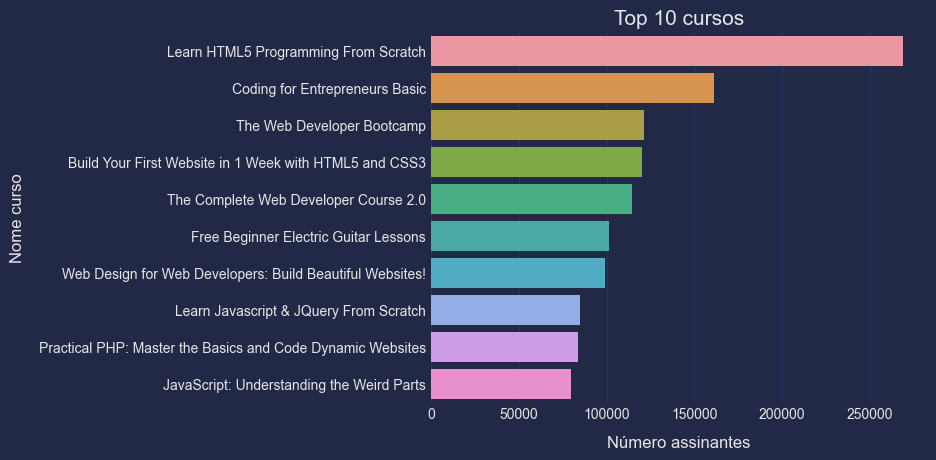

In [23]:
fig, ax = plt.subplots()

ax = sns.barplot( data = df_udemy_top_10_cursos, x = 'num_subscribers', y = 'course_title')
plt.title('Top 10 cursos', fontsize = 15)
ax.set_ylabel('Nome curso', labelpad = 10, fontsize = 12)
ax.set_xlabel('Número assinantes', labelpad = 10, fontsize = 12)

plt.show()